Thesis Data Analysis Process

First of data cleaning process<br>
Remove empty data<br>
Remove outliers<br>
Get the statistical data<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arch
import scipy.stats as stats
import statsmodels.api as sm
import skfuzzy as fuzz 

Realized volatility is the square root of realized variance, which is the sum of squared return. Realized volatility is used to calculate the performance of the volatility prediction method.

Stock daily returns indicate the gain or loss per day for a given stock. We get it by subtracting the opening price from the closing price.

In [3]:
#Data from NSE
NSE_data = pd.read_csv('Price_History.csv')

In [4]:
NSE_data

,Days,Date,Close,Net,%Chg,Open,Low,High
0,1,4/1/2011,90.33,NaN,NaN,90.33,90.33,90.33
1,2,4/4/2011,91.55,1.22,1.35%,91.55,91.55,91.55
2,3,4/5/2011,92.92,1.37,1.50%,91.55,91.55,92.92
3,4,4/6/2011,92.98,0.06,0.06%,92.98,92.98,92.98
4,5,4/7/2011,93.29,0.31,0.33%,93.29,93.29,93.29
...,...,...,...,...,...,...,...,...
2300,2301,7/23/2020,132.44,1.41,1.08%,132.44,132.44,132.44
2301,2302,7/24/2020,134.59,2.15,1.62%,134.59,134.59,134.59
2302,2303,7/27/2020,137.37,2.78,2.07%,137.37,137.37,137.37
2303,2304,7/28/2020,134.80,-2.57,-1.87%,134.80,134.80,134.80


In [5]:
NSE_data.head()

,Days,Date,Close,Net,%Chg,Open,Low,High
0,1,4/1/2011,90.33,NaN,NaN,90.33,90.33,90.33
1,2,4/4/2011,91.55,1.22,1.35%,91.55,91.55,91.55
2,3,4/5/2011,92.92,1.37,1.50%,91.55,91.55,92.92
3,4,4/6/2011,92.98,0.06,0.06%,92.98,92.98,92.98
4,5,4/7/2011,93.29,0.31,0.33%,93.29,93.29,93.29


Pandas has the percentage change 'pct_change' method to calculate the percentage of changes in the daily returns. Let’s use it and store it in a new column “daily_returns”.

In [6]:
NSE_data['daily_return']=(NSE_data['Close'].pct_change())*100

In [7]:
NSE_data.dropna(inplace=True)

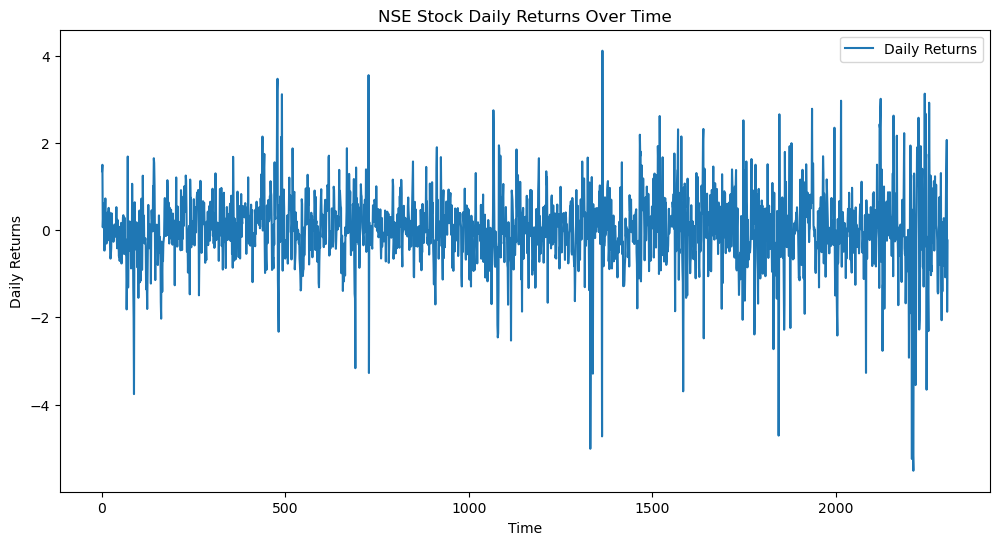

In [8]:
fig,ax=plt.subplots(figsize=(12,6))
ax.spines[['top','right','left','bottom']].set_visible(False)
plt.plot(NSE_data['daily_return'], label = 'Daily Returns')
plt.legend(loc='best')
plt.title('NSE Stock Daily Returns Over Time')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
# Add axis labels
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Daily Returns')  # Label for the y-axis
plt.show()

log() is a function given in numpy package in python. It calculates the natural log of the value given inside it.

In [9]:
NSE_data['Log Return'] = np.log(NSE_data['Close']) - np.log(NSE_data['Close'].shift(1))

In [10]:
NSE_data.head()

,Days,Date,Close,Net,%Chg,Open,Low,High,daily_return,Log Return
1,2,4/4/2011,91.55,1.22,1.35%,91.55,91.55,91.55,1.350603,NaN
2,3,4/5/2011,92.92,1.37,1.50%,91.55,91.55,92.92,1.496450,0.014854
3,4,4/6/2011,92.98,0.06,0.06%,92.98,92.98,92.98,0.064572,0.000646
4,5,4/7/2011,93.29,0.31,0.33%,93.29,93.29,93.29,0.333405,0.003329
5,6,4/8/2011,93.73,0.44,0.47%,93.73,93.73,93.73,0.471648,0.004705


In [11]:
NSE_data.dropna(inplace=True)

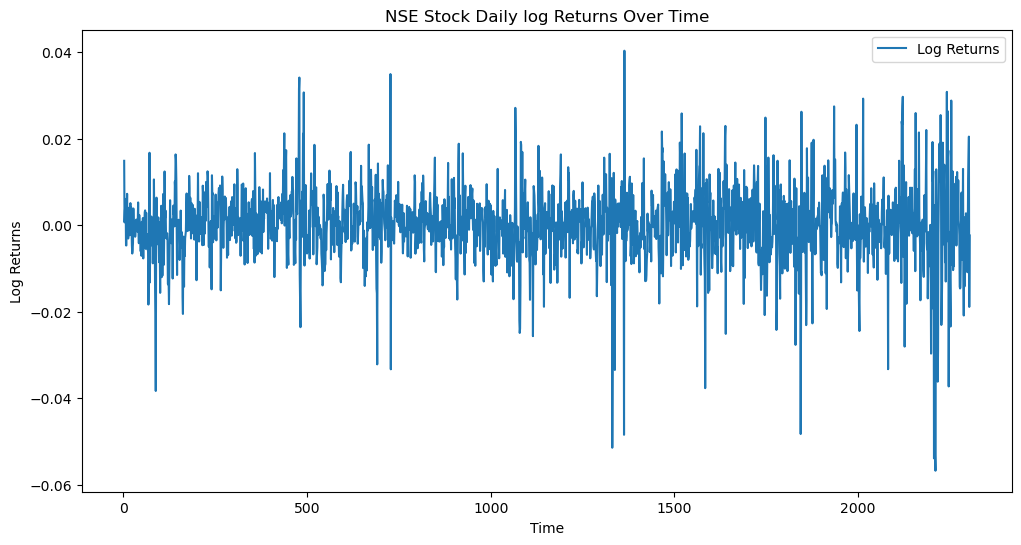

In [12]:
fig,ax=plt.subplots(figsize=(12,6))
ax.spines[['top','right','left','bottom']].set_visible(False)
plt.plot(NSE_data['Log Return'], label = 'Log Returns')
plt.legend(loc='best')
plt.title('NSE Stock Daily log Returns Over Time')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
# Add axis labels
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Log Returns')  # Label for the y-axis
plt.show()

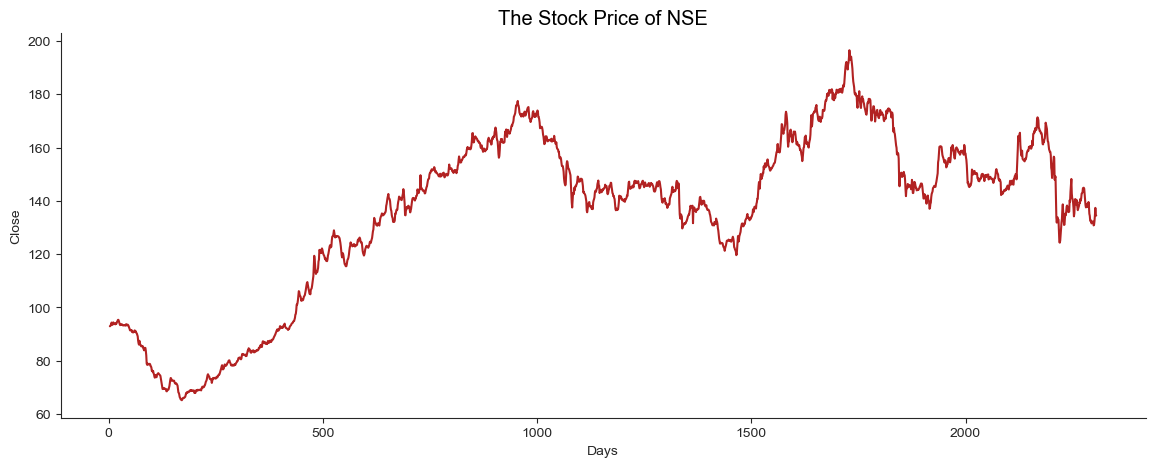

In [13]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=NSE_data,x="Days",y='Close',color='firebrick')
sns.despine()
plt.title("The Stock Price of NSE",size='x-large',color='black')
plt.show()

In the plot of daily NSE data it is evident that unconditional mean and variance are changing over time, and the series has an increasing trend. The changing mean and variance of daily NSE data over time is an indication of the nonstationarity of the level series. This implies that it is challenging to model ARIMA and ARCH/GARCH-type models for nonstationary series. Therefore, to achieve stationarity, logarithmic transformation was applied.

**Statistical properties of daily NSE log return data**

The summary statistic shows

In [21]:
adf_test = sm.tsa.adfuller(NSE_data['Log Return'])
adf_p_value = adf_test[1]
formated_p_value_adf = "{:.4f}".format(adf_p_value)

In [22]:
NSE_data.describe()

mean_value = NSE_data['Log Return'].mean()

# Calculate median
median_value = NSE_data['Log Return'].median()

# Calculate standard deviation
std_deviation = NSE_data['Log Return'].std()

#Calculate Variance
variance = NSE_data['Log Return'].var()

# Calculate skewness
skewness_value = NSE_data['Log Return'].skew()

# Calculate kurtosis
kurtosis_value = NSE_data['Log Return'].kurt()

jarque_bera=stats.jarque_bera(NSE_data['Log Return'])

#Perform ARCH test
#model = arch_model(NSE_data['Log Return'])
#arch_test = model.fit(disp='off').arch_lm_test()
arch_test = arch.arch_model(NSE_data['Log Return'], vol='Garch')
arch_p_value = adf_test[1]
formated_p_value_arch = "{:.4f}".format(arch_p_value)


#adf test
adf_test = sm.tsa.adfuller(NSE_data['Log Return'])
adf_p_value = adf_test[1]
formated_p_value_adf = "{:.4f}".format(adf_p_value)

#print("ADF Test p-value:", formatted_p_value_adf)

# Perform Phillips-Perron test
pp_test_result = sm.tsa.adfuller(NSE_data['Log Return'], autolag='AIC')
adf_statistic, p_value, lags, nobs, critical_values, icbest = pp_test_result
formated_p_value = "{:.4f}".format(p_value)
# Perform Jarque-Bera test
jarque_bera=stats.jarque_bera(NSE_data['Log Return'])
statistic, p_value = jarque_bera
jarque_p_value = "{:.4f}".format(p_value)
#print("p-value:",jarque_p_value)
###from statsmodels.tsa.stattools import adfuller
###print(adfuller(NSE_data['Log Return']))
###print(tabulate(table, headers="firstrow"))
###print(jarque_bera," ")

table = [
    ["Statistic", "Value"],
    ["Mean", mean_value],
    ["Median", median_value],
    ["Standard Deviation", std_deviation],
    ["Variance", variance],
    ["Skewness", skewness_value],
    ["Kurtosis", kurtosis_value],
    ['ARCH Test p-value',formated_p_value_arch],
    ['ADF Test p-value', formated_p_value_adf],
    ['PP Test p-value', formated_p_value],
    ['Jarque-Bera p-value', jarque_p_value]
]

# Print the table
print("Summary Statistics:")
for row in table:
    print("{:20} {}".format(row[0], row[1]))




Summary Statistics:
Statistic            Value
Mean                 0.00016696926529736876
Median               0.00021146865056120845
Standard Deviation   0.008211376147613168
Variance             6.742669823759047e-05
Skewness             -0.7136688987963047
Kurtosis             6.377041433290177
ARCH Test p-value    0.0000
ADF Test p-value     0.0000
PP Test p-value      0.0000
Jarque-Bera p-value  0.0000


Now by using the first 800 (that is, for T = 800) simulated data points, the study has obtained the following results. Since the study has identified that the residual series follows Student’s t-distribution, then by using this distribution type, EGARCH − ANN(1, 1, 2, 1) model is obtained as the best fitted model to these selected data. 

 **Realised Volatility**

In [23]:
from skfuzzy import control as ctrl

In [24]:
NSE_data.head(5)

,Days,Date,Close,Net,%Chg,Open,Low,High,daily_return,Log Return
2,3,4/5/2011,92.92,1.37,1.50%,91.55,91.55,92.92,1.496450,0.014854
3,4,4/6/2011,92.98,0.06,0.06%,92.98,92.98,92.98,0.064572,0.000646
4,5,4/7/2011,93.29,0.31,0.33%,93.29,93.29,93.29,0.333405,0.003329
5,6,4/8/2011,93.73,0.44,0.47%,93.73,93.73,93.73,0.471648,0.004705
6,7,4/11/2011,94.30,0.57,0.61%,94.30,94.30,94.30,0.608130,0.006063


In [25]:
data = {'Date': NSE_data['Date'],
        'Price': NSE_data['Close']}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df_first_800 = df.iloc[:800]
df.set_index('Date', inplace=True)

# Calculate daily returns
df['Returns'] = df['Price'].pct_change()

# Calculate realized volatility (annualized)
n = len(df)  # Number of data points
returns = df['Returns'].dropna().values  # Drop NaN values and convert to numpy array

# Daily realized volatility
daily_volatility = np.std(returns, ddof=1)
daily_returns = returns.mean()
# Annualized realized volatility
annualized_volatility = daily_volatility * np.sqrt(252)  # Assuming 252 trading days in a year

print("Daily Volatility:", daily_volatility)
print("Annualized Volatility:", annualized_volatility)
print('Daily Returns',daily_returns)

Daily Volatility: 0.00818609167162287
Annualized Volatility: 0.1299501766361468
Daily Returns 0.00019421002484107595


In [26]:
data = {'Date': NSE_data['Days'],
        'Price': NSE_data['Close']}
df = pd.DataFrame(data)

In [27]:
df_first_800.head()

,Date,Price
2,2011-04-05,92.92
3,2011-04-06,92.98
4,2011-04-07,93.29
5,2011-04-08,93.73
6,2011-04-11,94.30


**Hybrid EGARCH-ANN  Returns**

p=1, q=1 - MSE: 1.4247943465033228, MAE: 0.9577104718325216, RMSE: 1.1936474967524218
p=1, q=2 - MSE: 1.424236159950767, MAE: 0.9571518830356881, RMSE: 1.1934136583560484
p=2, q=1 - MSE: 1.4226119678670075, MAE: 0.9568636401827738, RMSE: 1.192732982635681
p=2, q=2 - MSE: 1.422612544459682, MAE: 0.9568637699909625, RMSE: 1.1927332243463673
Best EGARCH parameters: (2, 1)
Best EGARCH MSE: 1.4226119678670075
Best EGARCH MAE: 0.9568636401827738
Best EGARCH RMSE: 1.192732982635681
EGARCH-ANN RMSE: 0.1150488827693598
EGARCH-ANN MSE: 0.013236245426477894
EGARCH-ANN MAE: 0.07105951569336297


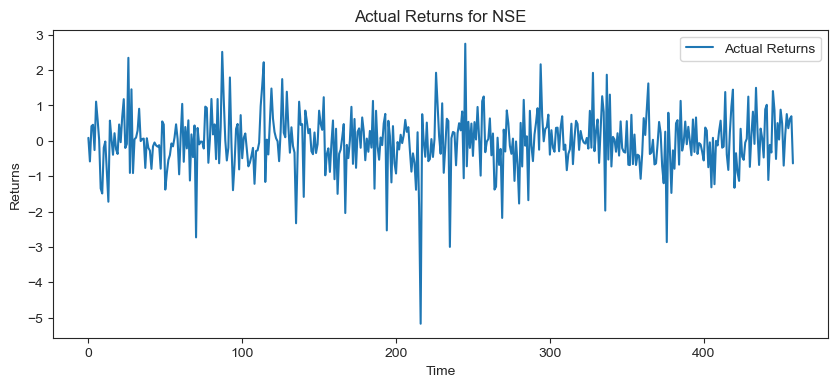

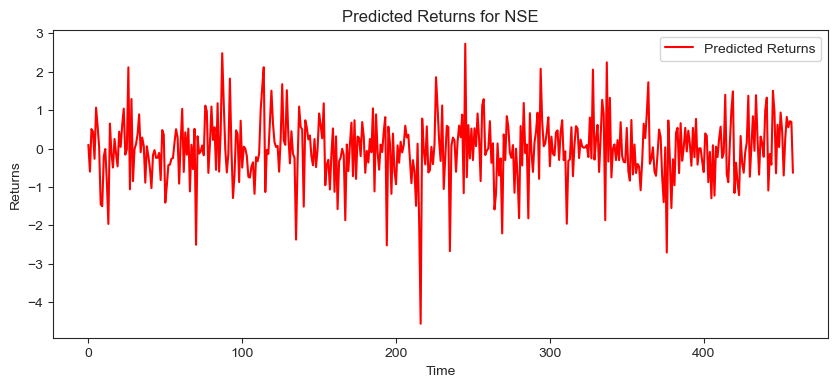

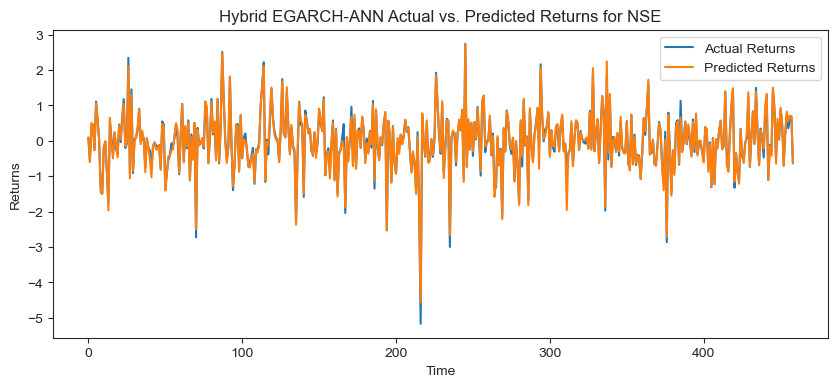

In [59]:
# Load Libraries
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load your financial return data here
stock_data = pd.read_csv('Price_History.csv')
returns = 100 * stock_data['Close'].pct_change().dropna()

# Create sequences for ANN
sequence_length = 10
X, y = [], []

for i in range(len(returns) - sequence_length):
    X.append(returns[i:i+sequence_length].values)  # Use raw returns for input
    y.append(returns[i+sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid for GARCH model
p_values = range(1, 3)  # Order of the autoregressive component
q_values = range(1, 3)  # Order of the moving average component

best_rmse = float('inf')
best_mse = float('inf')
best_mae = float('inf')
best_params = None

for p in p_values:
    for q in q_values:
        try:
            # Create and fit the GARCH model
            model = arch_model(returns, vol='EGarch', p=p, q=q)
            results = model.fit(disp='off')

            # Calculate RMSE
            volatility_forecast = np.sqrt(results.conditional_volatility)
            rmse = np.sqrt(mean_squared_error(returns, volatility_forecast)) 
            # Calculate MSE and MAE
            mse = mean_squared_error(returns, volatility_forecast)
            mae = np.mean(np.abs(returns - volatility_forecast))

            # Check if the current model is the best so far
            if rmse < best_rmse:
                best_mse = mse
                best_mae = mae
                best_rmse = rmse
                best_params = (p, q)

            print(f"p={p}, q={q} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

        except Exception as e:
            print(f"p={p}, q={q} - Error: {e}")

print("Best EGARCH parameters:", best_params)
print("Best EGARCH MSE:", best_mse)
print("Best EGARCH MAE:", best_mae)
print("Best EGARCH RMSE:", best_rmse)

# Now, let's use the best GARCH model to forecast volatility
best_p, best_q = best_params
best_garch_model = arch_model(returns, vol='EGarch', p=best_p, q=best_q)
egarch_results = best_garch_model.fit(disp='off')
volatility_forecast = np.sqrt(egarch_results.conditional_volatility)

# Define a parameter grid for ANN model
ann_param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh']
}

# Create the MLPRegressor model
ann_model = MLPRegressor(random_state=42)

# Define the best hyperparameters obtained from the grid search for ANN
best_ann_hidden_layer_size = (10,)  # Replace with your best value
best_ann_alpha = 0.0001  # Replace with your best value
best_ann_activation = 'relu'  # Replace with your best value

# Train the best ANN model with the selected hyperparameters
best_ann_model = MLPRegressor(hidden_layer_sizes=best_ann_hidden_layer_size, alpha=best_ann_alpha, activation=best_ann_activation, random_state=42)
best_ann_model.fit(X_train, y_train)

# Predict future returns using the hybrid GARCH-ANN model
combined_predictions = best_ann_model.predict(X_val)

# Calculate RMSE for the combined predictions
combined_rmse = np.sqrt(mean_squared_error(y_val, combined_predictions))
print(f"EGARCH-ANN RMSE: {combined_rmse}")

# Calculate MSE and MAE for the combined predictions
combined_mse = mean_squared_error(y_val, combined_predictions)
combined_mae = np.mean(np.abs(y_val - combined_predictions))

print(f"EGARCH-ANN MSE: {combined_mse}")
print(f"EGARCH-ANN MAE: {combined_mae}")
# Plot actual returns
plt.figure(figsize=(10, 4))
plt.plot(y_val, label='Actual Returns', linestyle='-', markersize=3)
plt.title('Actual Returns for NSE')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plot predicted returns
plt.figure(figsize=(10, 4))
plt.plot(combined_predictions, label='Predicted Returns', linestyle='-', markersize=2, color= "red")
plt.title('Predicted Returns for NSE')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()


# Plot actual returns
plt.figure(figsize=(10, 4))
plt.plot(y_val, label='Actual Returns', linestyle='-', markersize=3)

# Plot predicted returns
plt.plot(combined_predictions, label='Predicted Returns', linestyle='-')
plt.title('Hybrid EGARCH-ANN Actual vs. Predicted Returns for NSE')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

The above shows for the Combined model EGARCH-ANN the MAE, MSE are lower which proves that the hybrid EGARCH is better in performance compared to EGARCH Model

**Hybrid Fuzzy-EGARCH-ANN  Volatility**

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9461046378231.242
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4018938.456584667
Iteration:      3,   Func. Count:     23,   Neg. LLF: 19851.027589064393
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2891.3477074826533
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2580.8740576678247
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2580.3124058129742
Iteration:      7,   Func. Count:     50,   Neg. LLF: 2580.309901455763
Iteration:      8,   Func. Count:     55,   Neg. LLF: 2580.3098489948966
Iteration:      9,   Func. Count:     60,   Neg. LLF: 2580.3098480202357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2580.3098480202357
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9
Epoch 1/50
56/56 [==============================] - 1s 3ms/step - loss: 0.8301
Epoch 2/50
56/56 [==============================] - 0s 3ms/

C:\Users\user\AppData\Local\Temp\ipykernel_12988\1009834213.py:61: RuntimeWarning: divide by zero encountered in true_divide
  numerator = np.sum(((x - c[k]) / a[k]) ** 2, axis=1)
C:\Users\user\AppData\Local\Temp\ipykernel_12988\1009834213.py:61: RuntimeWarning: invalid value encountered in true_divide
  numerator = np.sum(((x - c[k]) / a[k]) ** 2, axis=1)


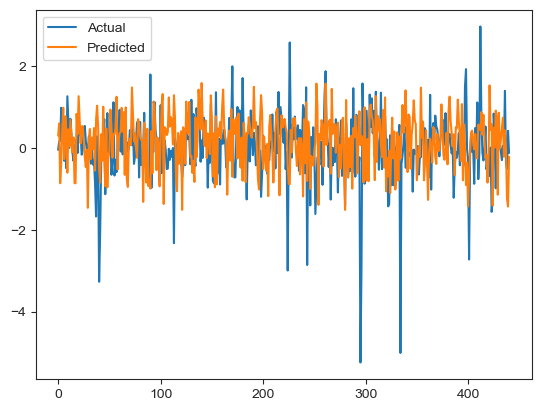

In [58]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from arch import arch_model
import matplotlib.pyplot as plt

# Load and preprocess your financial data
stock_data = pd.read_csv('Price_History.csv')
returns = 100 * stock_data['Close'].pct_change().dropna() # Replace 'Returns' with the actual column name
volatility = np.std(returns)

# Define hyperparameters
p = 1  # EGARCH lag order
q = 1  # EGARCH order
#m = 2  # Number of fuzzy sets
s = 1  # Number of neurons in the ANN hidden layer
R = 2  # Number of fuzzy rules
#k = 5
#epsilon_k = 0.1
#omega_k = 0.5

# Define your input features (X) based on your dataset
# For example, you might use lagged returns and volatility as features
sequence_length = 100
X, y = [], []

for i in range(len(returns) - sequence_length):
    X.append(returns[i:i+sequence_length].values)  # Use raw returns for input
    y.append(returns[i+sequence_length])

X, y = np.array(X), np.array(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fuzzy membership function parameters (You need to define these)
c_kl = np.zeros((R, p + q))  # Centers of fuzzy sets
a_kl = np.zeros((R, p + q))  # Spreads of fuzzy sets

# Define and train your EGARCH model
egarch_model = arch_model(returns, vol='EGarch', p=1, q=1)
egarch_results = egarch_model.fit()

# Define and train your ANN model
model = Sequential()
model.add(Dense(s, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Fuzzification layer
def fuzzy_membership(x, c, a):
    R = len(c)  # Number of rules
    membership_values = np.zeros((len(x), R))  # Initialize membership values
    
    for k in range(R):
        # Calculate membership values for rule k
        numerator = np.sum(((x - c[k]) / a[k]) ** 2, axis=1)
        membership_values[:, k] = np.exp(-0.5 * numerator)
    
    return membership_values

# Firing strength layer
def firing_strength(x, c, a):
    return np.prod(fuzzy_membership(x, c, a), axis=1)

# Normalization layer
def normalize_firing_strength(u):
    return u / np.sum(u)

# Consequent layer
def calculate_consequent(x, omega_k, epsilon_k):
    """
    Calculate the consequent for a rule.

    Parameters:
    - x: Input features (X_test for a specific data point)
    - omega_k: Omega parameter for the rule
    - epsilon_k: Epsilon parameter for the rule

    Returns:
    - f_k: Consequent value for the rule
    """
    f_k = omega_k * epsilon_k * x
    return f_k

# Combine predictions using the fuzzy-EGARCH-ANN framework
y_pred = np.zeros(len(X_test))
for k in range(R):
    # Fuzzification
    fuzzy_inputs = fuzzy_membership(X_test, c_kl[k], a_kl[k])
    
    # Firing strength
    u_k = firing_strength(fuzzy_inputs, c_kl[k], a_kl[k])
    
    # Normalization
    w_k = normalize_firing_strength(u_k)
    
    # Calculate consequents
    f_k = calculate_consequent(X_test, omega_k, epsilon_k)
    
    # Weighted average of individual rule outputs
    y_pred += omega_k * np.sum(f_k, axis=1)  # Sum along axis 1 to get a 1D array
    
# Calculate forecast error metrics (MSFE, MAE, MSE)
msfe = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)

print("Mean Squared Forecast Error (MSFE):", msfe)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Optionally, you can plot the predictions and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()





In [41]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from arch import arch_model
import matplotlib.pyplot as plt

# Load and preprocess your financial data
stock_data = pd.read_csv('Price_History.csv')
returns = 100 * stock_data['Close'].pct_change().dropna() # Replace 'Returns' with the actual column name
volatility = np.std(returns)

# Define hyperparameters
p = 1  # EGARCH lag order
q = 1  # EGARCH order
m = 2  # Number of fuzzy sets
s = 1  # Number of neurons in the ANN hidden layer
R = 3  # Number of fuzzy rules

# Define your input features (X) based on your dataset
# For example, you might use lagged returns and volatility as features
X = returns
y =
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fuzzy membership function parameters (You need to define these)
c_kl = np.zeros((R, p + q))  # Centers of fuzzy sets
a_kl = np.zeros((R, p + q))  # Spreads of fuzzy sets

# Define and train your EGARCH model
egarch_model = arch_model(returns, vol='EGarch', p=p, q=q)
egarch_results = egarch_model.fit()

# Define and train your ANN model
model = Sequential()
model.add(Dense(s, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Fuzzification layer
def fuzzy_membership(x, c, a):
    # Ensure c and a have compatible shapes
    c_expanded = np.expand_dims(c, axis=0)  # Shape: (1, R, p + q)
    a_expanded = np.expand_dims(a, axis=0)  # Shape: (1, R, p + q)
    
    # Expand dimensions of x to allow broadcasting
    x_expanded = np.expand_dims(x, axis=1)  # Shape: (459, 1, p + q)
    
    # Calculate membership values
    membership = np.exp(-0.5 * np.sum(((x_expanded - c_expanded) / a_expanded) ** 2, axis=2))
    

# Firing strength layer
def firing_strength(x, c, a):
    return np.prod(fuzzy_membership(x, c, a), axis=1)

# Normalization layer
def normalize_firing_strength(u):
    return u / np.sum(u)

# Consequent layer
def calculate_consequent(x, params):
    # Define the consequent function based on your model structure
    # For each rule, calculate the consequent value
    return consequents

# Combine predictions using the fuzzy-EGARCH-ANN framework
y_pred = np.zeros(len(X_test))
for k in range(R):
    # Fuzzification
    fuzzy_inputs = fuzzy_membership(X_test, c_kl[k], a_kl[k])
    
    # Firing strength
    u_k = firing_strength(fuzzy_inputs, c_kl[k], a_kl[k])
    
    # Normalization
    w_k = normalize_firing_strength(u_k)
    
    # Calculate consequents
    f_k = calculate_consequent(X_test, params_for_rule_k)
    
    # Weighted average of individual rule outputs
    y_pred += w_k * f_k

# Calculate forecast error metrics (MSFE, MAE, MSE)
msfe = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)

print("Mean Squared Forecast Error (MSFE):", msfe)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Optionally, you can plot the predictions and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


SyntaxError: invalid syntax (1700519787.py, line 26)

In [ ]:
# Load Libraries
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load your financial return data here
stock_data = pd.read_csv('Price_History.csv')
returns = 100 * stock_data['Close'].pct_change().dropna()

# Create sequences for ANN
sequence_length = 10
X, y = [], []

for i in range(len(returns) - sequence_length):
    X.append(returns[i:i+sequence_length].values)  # Use raw returns for input
    y.append(returns[i+sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid for GARCH model
p_values = range(1, 3)  # Order of the autoregressive component
q_values = range(1, 3)  # Order of the moving average component

best_rmse = float('inf')
best_params = None

for p in p_values:
    for q in q_values:
        try:
            # Create and fit the GARCH model
            model = arch_model(returns, vol='EGarch', p=p, q=q)
            results = model.fit(disp='off')

            # Calculate RMSE
            volatility_forecast = np.sqrt(results.conditional_volatility)
            rmse = np.sqrt(mean_squared_error(returns, volatility_forecast))

            # Check if the current model is the best so far
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (p, q)

            print(f"p={p}, q={q} - RMSE: {rmse}")

        except Exception as e:
            print(f"p={p}, q={q} - Error: {e}")

print("Best EGARCH parameters:", best_params)
print("Best EGARCH RMSE:", best_rmse)

# Now, let's use the best GARCH model to forecast volatility
best_p, best_q = best_params
best_garch_model = arch_model(returns, vol='EGarch', p=best_p, q=best_q)
egarch_results = best_garch_model.fit(disp='off')
volatility_forecast = np.sqrt(egarch_results.conditional_volatility)

# Define a parameter grid for ANN model
ann_param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh']
}

# Create the MLPRegressor model
ann_model = MLPRegressor(random_state=42)

# Define the best hyperparameters obtained from the grid search for ANN
best_ann_hidden_layer_size = (10,)  # Replace with your best value
best_ann_alpha = 0.0001  # Replace with your best value
best_ann_activation = 'relu'  # Replace with your best value

# Train the best ANN model with the selected hyperparameters
best_ann_model = MLPRegressor(hidden_layer_sizes=best_ann_hidden_layer_size, alpha=best_ann_alpha, activation=best_ann_activation, random_state=42)
best_ann_model.fit(X_train, y_train)

# Predict future returns using the hybrid GARCH-ANN model
combined_predictions = best_ann_model.predict(X_val)

# Calculate RMSE for the combined predictions
combined_rmse = np.sqrt(mean_squared_error(y_val, combined_predictions))
print(f"Combined Model RMSE: {combined_rmse}")

# Plot actual returns
plt.figure(figsize=(10, 4))
plt.plot(y_val, label='Actual Returns', linestyle='-', markersize=3)

# Plot predicted returns
plt.plot(combined_predictions, label='Predicted Returns', linestyle='-')
plt.title('Hybrid EGARCH-ANN Actual vs. Predicted Returns for NSE')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [ ]:
# Load Libraries
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load your financial return data here
stock_data = pd.read_csv('Price_History.csv')
returns = 100 * stock_data['Close'].pct_change().dropna()

# Create sequences for ANN
sequence_length = 10
X, y = [], []

for i in range(len(returns) - sequence_length):
    X.append(returns[i:i+sequence_length].values)  # Use raw returns for input
    y.append(returns[i+sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid for GARCH model
p_values = range(1, 3)  # Order of the autoregressive component
q_values = range(1, 3)  # Order of the moving average component

best_rmse = float('inf')
best_params = None

for p in p_values:
    for q in q_values:
        try:
            # Create and fit the GARCH model
            model = arch_model(returns, vol='EGarch', p=p, q=q)
            results = model.fit(disp='off')

            # Calculate RMSE
            volatility_forecast = np.sqrt(results.conditional_volatility)
            rmse = np.sqrt(mean_squared_error(returns, volatility_forecast))

            # Check if the current model is the best so far
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (p, q)

            print(f"p={p}, q={q} - RMSE: {rmse}")

        except Exception as e:
            print(f"p={p}, q={q} - Error: {e}")

print("Best EGARCH parameters:", best_params)
print("Best EGARCH RMSE:", best_rmse)

# Now, let's use the best GARCH model to forecast volatility
best_p, best_q = best_params
best_garch_model = arch_model(returns, vol='EGarch', p=best_p, q=best_q)
egarch_results = best_garch_model.fit(disp='off')
volatility_forecast = np.sqrt(egarch_results.conditional_volatility)

# Define a parameter grid for ANN model
ann_param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh']
}

# Create the MLPRegressor model
ann_model = MLPRegressor(random_state=42)

# Define the best hyperparameters obtained from the grid search for ANN
best_ann_hidden_layer_size = (10,)  # Replace with your best value
best_ann_alpha = 0.0001  # Replace with your best value
best_ann_activation = 'relu'  # Replace with your best value

# Train the best ANN model with the selected hyperparameters
best_ann_model = MLPRegressor(hidden_layer_sizes=best_ann_hidden_layer_size, alpha=best_ann_alpha, activation=best_ann_activation, random_state=42)
best_ann_model.fit(X_train, y_train)

# Predict future returns using the hybrid GARCH-ANN model
combined_predictions = best_ann_model.predict(X_val)

# Calculate RMSE for the combined predictions
combined_rmse = np.sqrt(mean_squared_error(y_val, combined_predictions))
print(f"Combined Model RMSE: {combined_rmse}")

# Plot actual returns
plt.figure(figsize=(10, 4))
plt.plot(y_val, label='Actual Returns', linestyle='-', markersize=3)

# Plot predicted returns
plt.plot(combined_predictions, label='Predicted Returns', linestyle='-')
plt.title('Hybrid EGARCH-ANN Actual vs. Predicted Returns for NSE')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()